# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

667

In [72]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print("Beginning Data Retrieval ")
print("-----------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : bengkulu
Processing Record 2 of Set 1 : port lincoln
Processing Record 3 of Set 1 : luba
Processing Record 4 of Set 1 : beinamar
Processing Record 5 of Set 1 : bredasdorp
City not found. Skipping...
Processing Record 6 of Set 1 : samoded
Processing Record 7 of Set 1 : georgetown
Processing Record 8 of Set 1 : bluff
City not found. Skipping...
Processing Record 9 of Set 1 : saint george
Processing Record 10 of Set 1 : itamaraca
City not found. Skipping...
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : dubrovka
Processing Record 13 of Set 1 : mataura
City not found. Skipping...
Processing Record 14 of Set 1 : dikson
City not found. Skipping...
Processing Record 15 of Set 1 : thompson
Processing Record 16 of Set 1 : sinnamary
Processing Record 17 of Set 1 : aviles
Processing Record 18 of Set 1 : busselton
Processing Record 19 of Set 1 : pevek
Processing Record 20 of Set 1 : katy

Processing Record 31 of Set 4 : pareora
Processing Record 32 of Set 4 : bethel
Processing Record 33 of Set 4 : nikolskoye
City not found. Skipping...
Processing Record 34 of Set 4 : faya
City not found. Skipping...
Processing Record 35 of Set 4 : nanortalik
Processing Record 36 of Set 4 : samarai
Processing Record 37 of Set 4 : dawei
Processing Record 38 of Set 4 : kodiak
City not found. Skipping...
Processing Record 39 of Set 4 : nizhnevartovsk
Processing Record 40 of Set 4 : newcastle
Processing Record 41 of Set 4 : awbari
Processing Record 42 of Set 4 : upernavik
Processing Record 43 of Set 4 : parabel
City not found. Skipping...
Processing Record 44 of Set 4 : lugovoy
City not found. Skipping...
Processing Record 45 of Set 4 : vaitape
City not found. Skipping...
Processing Record 46 of Set 4 : nouakchott
Processing Record 47 of Set 4 : portland
City not found. Skipping...
Processing Record 48 of Set 4 : ichinoseki
Processing Record 49 of Set 4 : arandis
Processing Record 50 of Set 

Processing Record 19 of Set 8 : caravelas
Processing Record 20 of Set 8 : vila velha
Processing Record 21 of Set 8 : uige
City not found. Skipping...
Processing Record 22 of Set 8 : ogod
Processing Record 23 of Set 8 : klaksvik
Processing Record 24 of Set 8 : ilulissat
Processing Record 25 of Set 8 : matara
Processing Record 26 of Set 8 : provideniya
Processing Record 27 of Set 8 : hay river
Processing Record 28 of Set 8 : barra do garcas
Processing Record 29 of Set 8 : cabedelo
Processing Record 30 of Set 8 : veseloyarsk
Processing Record 31 of Set 8 : soyo
Processing Record 32 of Set 8 : port antonio
Processing Record 33 of Set 8 : shimoda
Processing Record 34 of Set 8 : dutse
Processing Record 35 of Set 8 : ostrovnoy
Processing Record 36 of Set 8 : richards bay
Processing Record 37 of Set 8 : gatesville
Processing Record 38 of Set 8 : jaru
Processing Record 39 of Set 8 : havre-saint-pierre
Processing Record 40 of Set 8 : severo-kurilsk
Processing Record 41 of Set 8 : guaiuba
Process

Processing Record 5 of Set 12 : conceicao do araguaia
Processing Record 6 of Set 12 : bodden town
City not found. Skipping...
Processing Record 7 of Set 12 : shahreza
Processing Record 8 of Set 12 : alexandria
Processing Record 9 of Set 12 : marzuq
Processing Record 10 of Set 12 : vinni
City not found. Skipping...
Processing Record 11 of Set 12 : upata
Processing Record 12 of Set 12 : oum hadjer
City not found. Skipping...
Processing Record 13 of Set 12 : rio grande
Processing Record 14 of Set 12 : nantucket
Processing Record 15 of Set 12 : buraydah
City not found. Skipping...
Processing Record 16 of Set 12 : sao jose da coroa grande
Processing Record 17 of Set 12 : wilmington
Processing Record 18 of Set 12 : sydney
Processing Record 19 of Set 12 : boyolangu
Processing Record 20 of Set 12 : dumas
Processing Record 21 of Set 12 : lincoln
Processing Record 22 of Set 12 : nhulunbuy
Processing Record 23 of Set 12 : bures-sur-yvette
Processing Record 24 of Set 12 : abnub
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
# panda DF using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [76]:
# Count data
weather_dict.count()

City          612
Cloudiness    612
Country       612
Date          612
Humidity      612
Lat           612
Lng           612
Max Temp      612
Wind Speed    612
dtype: int64

In [78]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bengkulu,93,ID,1644376239,75,-3.8004,102.2655,27.46,3.66
1,Port Lincoln,98,AU,1644376239,57,-34.7333,135.8667,21.50,5.16
2,Luba,77,GQ,1644376239,85,3.4568,8.5547,26.34,3.04
3,Beïnamar,63,TD,1644376240,16,8.6698,15.3813,21.19,1.95
4,Bredasdorp,0,ZA,1644376240,86,-34.5322,20.0403,15.71,2.77
...,...,...,...,...,...,...,...,...,...
607,Gusau,91,NG,1644376419,12,12.1628,6.6614,20.15,5.29
608,Ust-Kuyga,91,RU,1644376420,99,70.0167,135.6000,-39.16,3.99
609,Dhāmnod,99,IN,1644376420,48,22.2167,75.4667,20.23,1.40
610,Stromness,100,GB,1644376420,73,58.9650,-3.2960,3.98,17.85


In [80]:
# Export to .csv file
weather_dict.to_csv(r'city_data.csv', index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
Humiditydata_df = weather_dict["Humidity"]
Humiditydata_df

0      75
1      57
2      85
3      16
4      86
       ..
607    12
608    99
609    48
610    73
611    68
Name: Humidity, Length: 612, dtype: int64

In [82]:
#  Get the indices of cities that have humidity over 100%.

In [83]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [84]:
quartiles = Humiditydata_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 63.0
The upper quartile of Humidity is: 91.0
The interquartile range of Humidity is: 28.0
Values below 21.0 could be outliers.
Values above 133.0 could be outliers.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

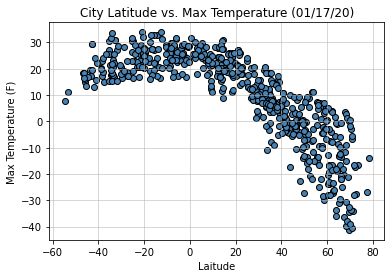

In [85]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

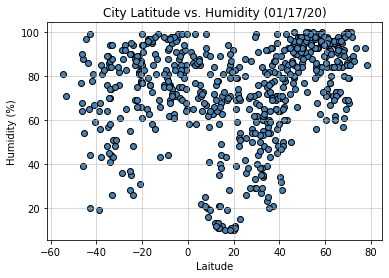

In [86]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

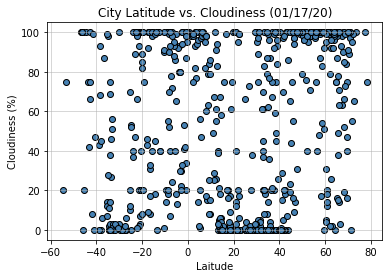

In [87]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

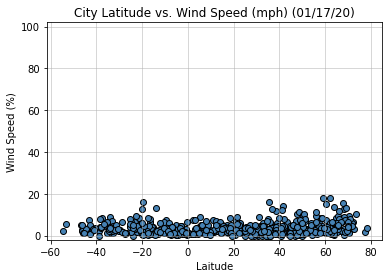

In [88]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,102)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [89]:
# Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.86


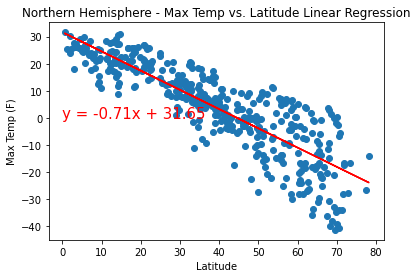

In [90]:
# Call an function #
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.43


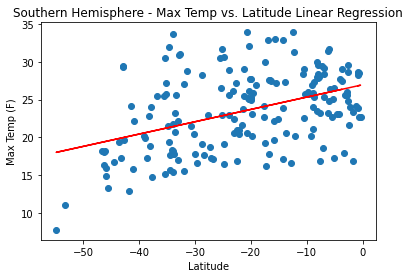

In [91]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.5


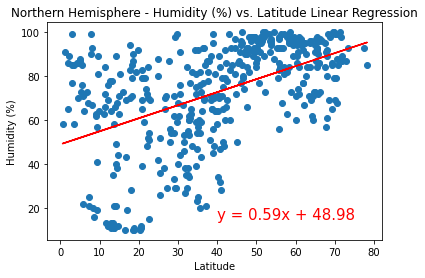

In [92]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.29


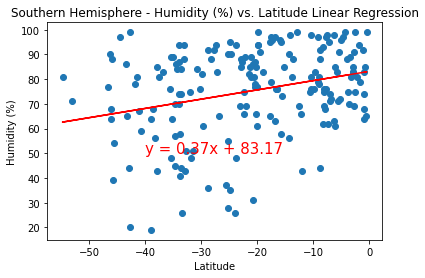

In [93]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.32


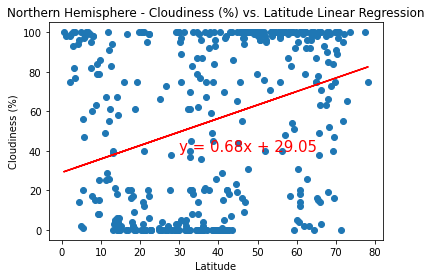

In [94]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.25


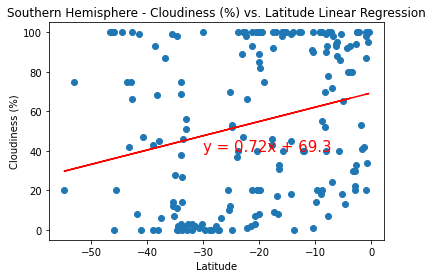

In [95]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.21


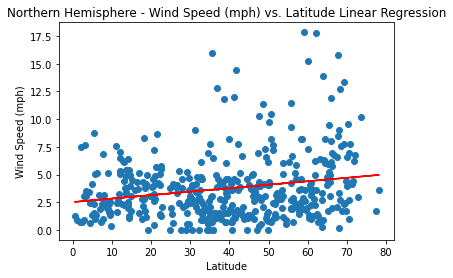

In [96]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.15


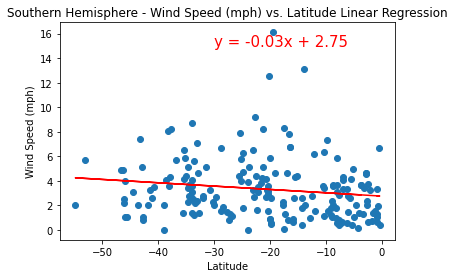

In [97]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")